In [8]:
import numpy as np
import pandas as pd
import torch

from torchvision.transforms import v2
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader


### Image Pre-processing

The VGG-16 model requires a 224x224 sized image with 3 channels (RGB) as input.

In [25]:

transform = v2.Compose([
    v2.Resize((224, 224)),  # Resizing to 224x224
    v2.ToTensor(),  # Converting to tensor
    ## Pixel normalization?
])

train_dataset = ImageFolder("data/cats-vs-dogs/train", transform=transform)
test_dataset = ImageFolder("data/cats-vs-dogs/test", transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)


/home/carlos/fine-tuning-vision-model/.venv/lib/python3.13/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


torch.Size([32, 3, 224, 224])
tensor([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


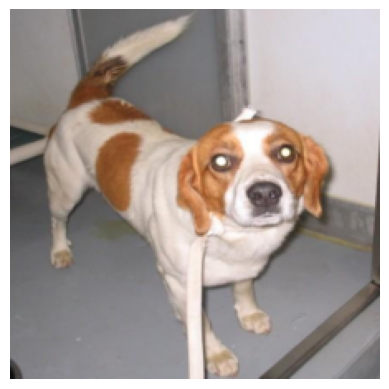

In [ ]:
import matplotlib.pyplot as plt

# Function to display an image
def imshow(tensor):
    image = tensor.numpy().transpose((1, 2, 0))  # Change from [C, H, W] to [H, W, C]
    image = np.clip(image, 0, 1)  # Clamp values to [0, 1] for display
    plt.imshow(image)
    plt.axis('off')
    plt.show()


# Show an image, its shape and labels
for images, labels in train_loader:
    print(images.shape)
    print(labels)
    imshow(images[0])
    break